In [ ]:
!sudo apt update
!sudo apt install libgtk2.0-dev pkg-config libgl1-mesa-glx
!pip uninstall opencv-python
!pip install opencv-python
!pip install deepface

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
41 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as re

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import base64
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📷 Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            div.appendChild(video);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js("takePhoto({})".format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
image_path = take_photo()
print("Image captured to:", image_path)



<IPython.core.display.Javascript object>

Image captured to: photo.jpg


✅ Detected Emotion: neutral


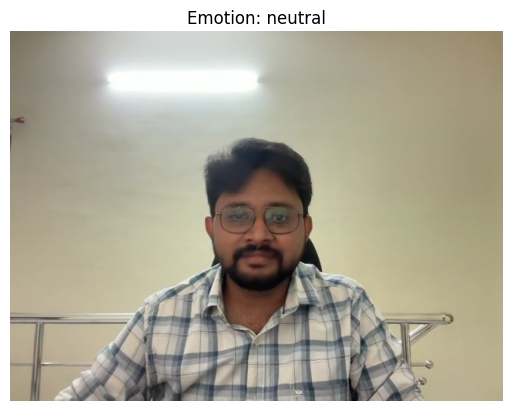

In [ ]:
# Read image from disk
img = cv2.imread(image_path)

# Check if image was loaded
if img is None:
    print("❌ Error: Image not found or invalid!")
else:
    # Run emotion detection
    try:
        result = DeepFace.analyze(img, actions=['emotion'], enforce_detection=False)
        emotion = result[0]['dominant_emotion']
        print("✅ Detected Emotion:", emotion)

        # Display image with emotion
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Emotion: {emotion}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print("❌ Emotion detection failed:", str(e))